In [1]:
import numpy as np
import os,sys,glob,shutil
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from skysat_stereo import asp_utils as asp
from pygeotools.lib import iolib,warplib,geolib,malib
from imview import pltlib


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib notebook

In [3]:
ba_pointmap = pd.read_csv('/nobackup/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/ba_pinhole/run-final_residuals_no_loss_function_pointmap_point_log_final_reproj_error.csv',skiprows=[1])

In [15]:
ba_pointmap

# lon        lat   height_above_datum   mean_residual  \
0      -108.118149  39.098134          2281.748878        0.144643   
1      -108.118142  39.100245          2284.510599        0.061055   
2      -108.118556  39.097776          2279.759332        0.274053   
3      -108.118553  39.098136          2277.914734        0.263970   
4      -108.118547  39.098510          2273.751014        0.186330   
...            ...        ...                  ...             ...   
365219 -108.168748  38.924607          2991.321384        0.023239   
365220 -108.168749  38.925163          2977.689364        0.094387   
365221 -108.168749  38.925716          2985.847508        0.209347   
365222 -108.168753  38.926825          2978.211342        0.111194   
365223 -108.168758  38.927659          2963.472100        0.115513   

         num_observations  
0                       2  
1                       2  
2                       5  
3                       5  
4                       5  
...                   ...  
365219                  2  
365220                  2  
365221                  2  
365222                  2  
365223                  2  

[365224 rows x 5 columns]

In [22]:
ba_pointmap.sort_values(by=' num_observations',ascending=False).head(1000)

# lon        lat   height_above_datum   mean_residual  \
20085  -108.118829  39.070752          2601.543247        0.420886   
20071  -108.118482  39.070748          2601.668799        0.415747   
14085  -108.120159  39.087575          2355.525479        0.279019   
116326 -108.144538  39.109576          2064.230687        0.159140   
160172 -108.145005  39.023194          3118.588496        0.487927   
...            ...        ...                  ...             ...   
117889 -108.144560  39.094883          2164.870266        0.296114   
144347 -108.119827  39.067675          2704.132638        0.291963   
142779 -108.144996  39.062872          2670.656371        0.214205   
142778 -108.144990  39.062521          2677.873044        0.179413   
134710 -108.147745  39.068790          2505.692425        0.283809   

         num_observations  
20085                   8  
20071                   8  
14085                   7  
116326                  7  
160172                  7  
...                   ...  
117889                  6  
144347                  6  
142779                  6  
142778                  6  
134710                  6  

[1000 rows x 5 columns]

In [23]:
ba_pointmap.keys()

Index(['# lon', ' lat', ' height_above_datum', ' mean_residual',
       ' num_observations'],
      dtype='object')

<IPython.core.display.Javascript object>


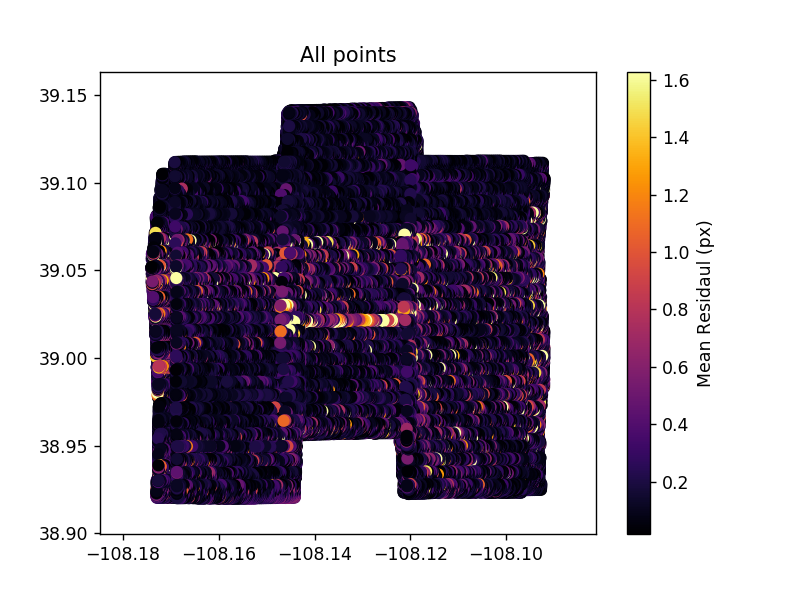

Text(0.5, 1.0, 'All points')

In [32]:
f,ax = plt.subplots()
clim = np.percentile(ba_pointmap[' mean_residual'].values,(2,98))
im = ax.scatter(ba_pointmap['# lon'],ba_pointmap[' lat'],
       c=ba_pointmap[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno')
plt.colorbar(im,label='Mean Residaul (px)')
plt.title("All points")

<IPython.core.display.Javascript object>


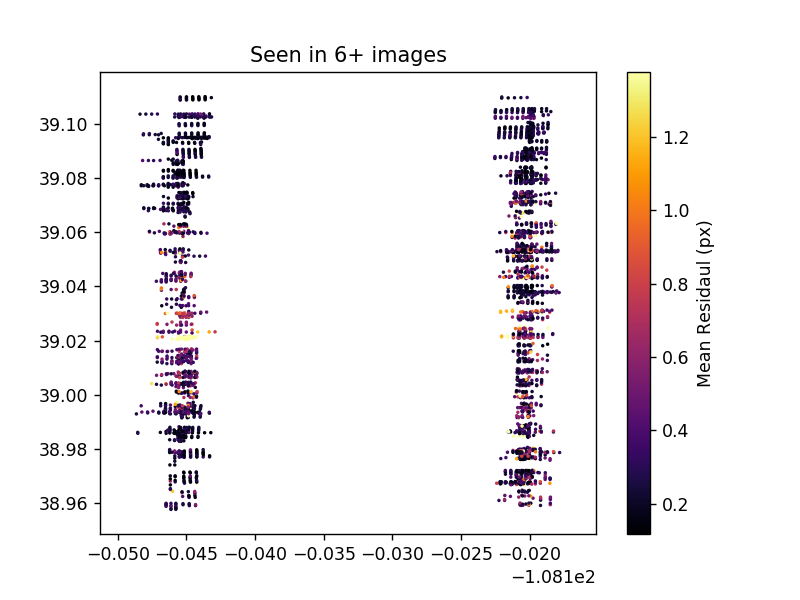

Text(0.5, 1.0, 'Seen in 6+ images')

In [204]:
mask_5_multiplicity = ba_pointmap[' num_observations']>=6
ba_pointmap_5above = ba_pointmap[mask_5_multiplicity]
f,ax = plt.subplots()
clim = np.percentile(ba_pointmap_5above[' mean_residual'].values,(2,98))
im = ax.scatter(ba_pointmap_5above['# lon'],ba_pointmap_5above[' lat'],
       c=ba_pointmap_5above[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno',s=1)
plt.colorbar(im,label='Mean Residaul (px)')
plt.title('Seen in 6+ images')

<IPython.core.display.Javascript object>


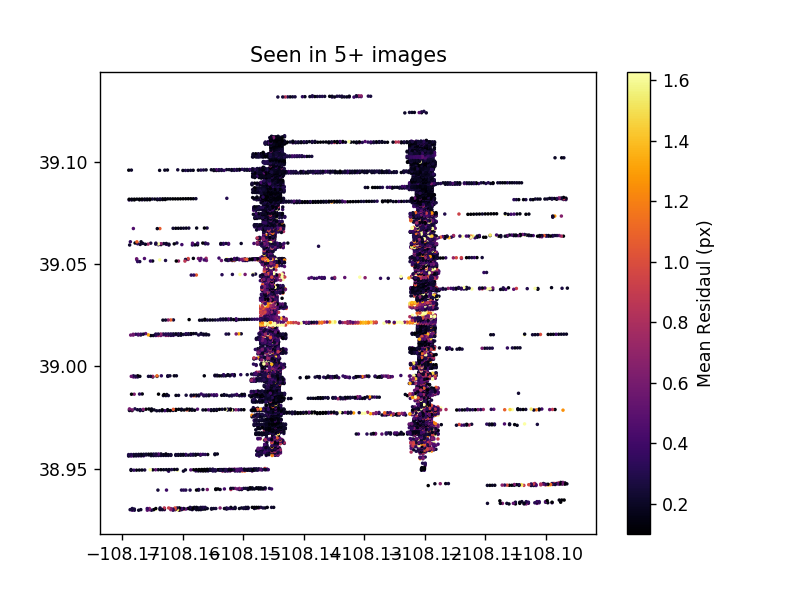

Text(0.5, 1.0, 'Seen in 5+ images')

In [203]:
mask_5_multiplicity = ba_pointmap[' num_observations']>=5
ba_pointmap_5above = ba_pointmap[mask_5_multiplicity]
f,ax = plt.subplots()
clim = np.percentile(ba_pointmap_5above[' mean_residual'].values,(2,98))
im = ax.scatter(ba_pointmap_5above['# lon'],ba_pointmap_5above[' lat'],
       c=ba_pointmap_5above[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno',s=1)
plt.colorbar(im,label='Mean Residaul (px)')
plt.title('Seen in 5+ images')

<IPython.core.display.Javascript object>


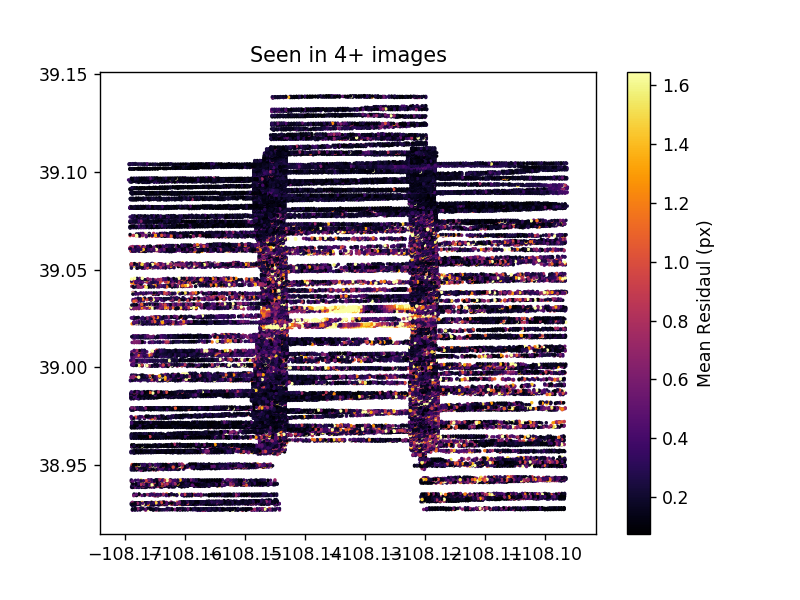

Text(0.5, 1.0, 'Seen in 4+ images')

In [152]:
mask_5_multiplicity = ba_pointmap[' num_observations']>=4
ba_pointmap_5above = ba_pointmap[mask_5_multiplicity]
f,ax = plt.subplots()
clim = np.percentile(ba_pointmap_5above[' mean_residual'].values,(2,98))
im = ax.scatter(ba_pointmap_5above['# lon'],ba_pointmap_5above[' lat'],
       c=ba_pointmap_5above[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno',s=1)
plt.colorbar(im,label='Mean Residaul (px)')
plt.title('Seen in 4+ images')

In [151]:
ba_pointmap_5above

# lon        lat   height_above_datum   mean_residual  \
2      -108.118556  39.097776          2279.759332        0.274053   
3      -108.118553  39.098136          2277.914734        0.263970   
4      -108.118547  39.098510          2273.751014        0.186330   
5      -108.118553  39.098834          2280.404354        0.220636   
6      -108.118555  39.099167          2284.961369        0.256914   
...            ...        ...                  ...             ...   
360582 -108.144335  38.959476          2823.487414        0.448360   
360590 -108.144700  38.959477          2825.607944        0.170043   
360591 -108.144695  38.959753          2824.654215        0.190384   
360602 -108.145054  38.959477          2825.513682        0.160512   
360610 -108.145406  38.960030          2821.089235        0.253887   

         num_observations  
2                       5  
3                       5  
4                       5  
5                       5  
6                       5  
...                   ...  
360582                  4  
360590                  4  
360591                  4  
360602                  4  
360610                  4  

[75969 rows x 5 columns]

The point distribution looks decent, although having a better distribution of 5+ images point would have been great. I see that the max number of images in which the point is visible is 8, which is a bit dissapointing, but should be ok.

#### Coregisteration Analysis

<IPython.core.display.Javascript object>


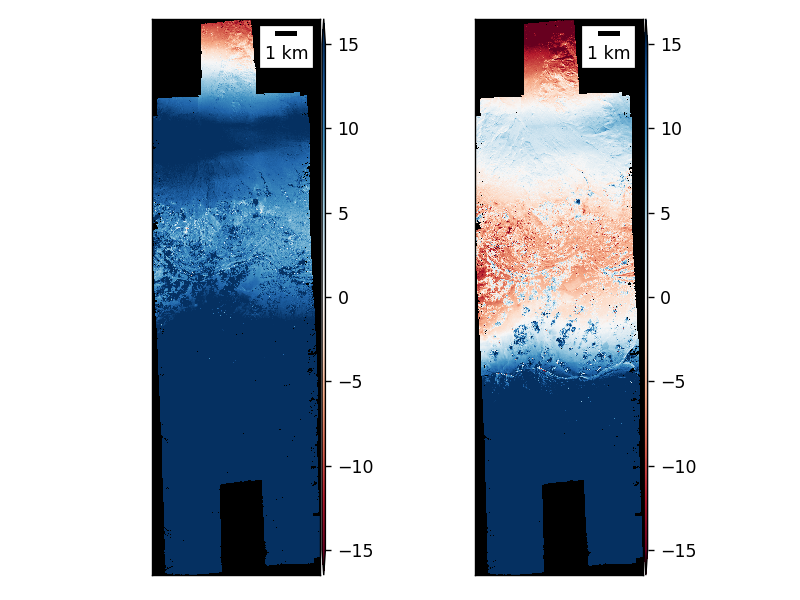

In [39]:
init_diff_map = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_triplet_median_mos_diff.tif'
fn_diff_map = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_run-trans_reference-DEM_diff.tif'
f,ax = plt.subplots(1,2)
pltlib.iv_fn(init_diff_map,cmap='RdBu',clim=(-15,15),full=True,ax=ax[0])
pltlib.iv_fn(fn_diff_map,cmap='RdBu',clim=(-15,15),full=True,ax=ax[1])

<IPython.core.display.Javascript object>


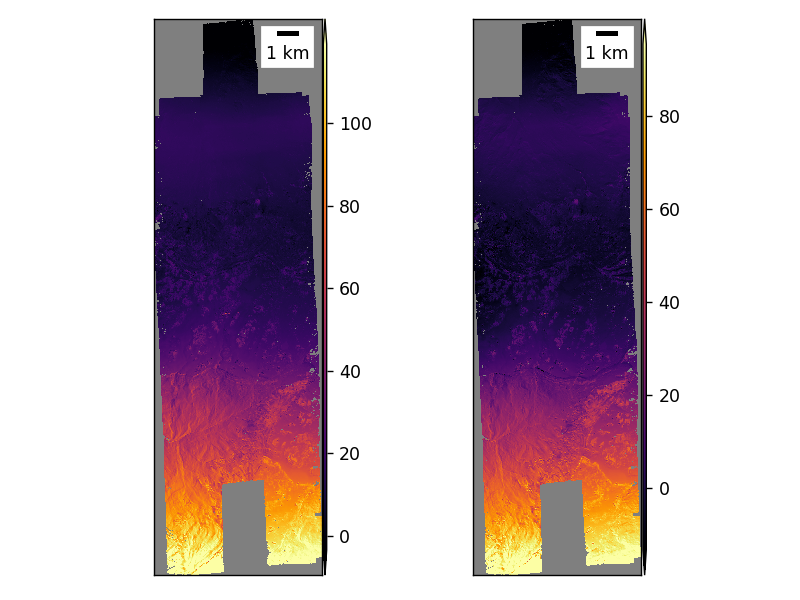

In [40]:
init_diff_map = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_triplet_median_mos_diff.tif'
fn_diff_map = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_run-trans_reference-DEM_diff.tif'
f,ax = plt.subplots(1,2)
pltlib.iv_fn(init_diff_map,cmap='inferno',full=True,ax=ax[0])
pltlib.iv_fn(fn_diff_map,cmap='inferno',full=True,ax=ax[1])

In [43]:
coreg_points_init = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/georegistered_dem_mos/run-beg_errors.csv',skiprows=[1,2])
coreg_points_fn = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/georegistered_dem_mos/run-end_errors.csv',skiprows=[1,2])

In [44]:
coreg_points_fn 

# latitude   longitude  height above datum (meters)  error (meters)
0       39.071082 -108.173824                  2527.361658       35.648154
1       39.071010 -108.173827                  2526.149824       35.578709
2       39.101536 -108.172541                  2253.121541       35.333700
3       39.101464 -108.172544                  2253.695594       35.465970
4       39.103046 -108.172389                  2243.631202       35.296623
...           ...         ...                          ...             ...
99995   38.991916 -108.091672                  3156.614654       28.079301
99996   38.991412 -108.091692                  3160.450896       26.680355
99997   38.991340 -108.091695                  3161.047654       26.794479
99998   38.992994 -108.091536                  3155.328412       32.252727
99999   38.992850 -108.091542                  3155.224321       32.727223

[100000 rows x 4 columns]

In [45]:
coreg_points_fn.keys()

Index(['# latitude', 'longitude', 'height above datum (meters)',
       'error (meters)'],
      dtype='object')

<IPython.core.display.Javascript object>


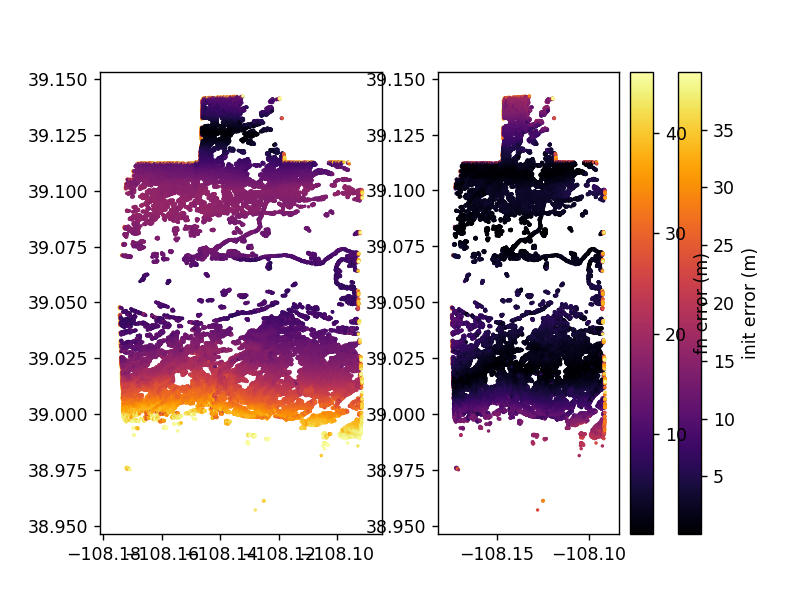

In [50]:
f,ax = plt.subplots(1,2)
im1 = ax[0].scatter(coreg_points_init['longitude'],coreg_points_init['# latitude'],
             c=coreg_points_init['error (meters)'],cmap='inferno',s=1)
plt.colorbar(im1,label='init error (m)')

im1 = ax[1].scatter(coreg_points_fn['longitude'],coreg_points_fn['# latitude'],
             c=coreg_points_fn['error (meters)'],cmap='inferno',s=1)
plt.colorbar(im1,label='fn error (m)')

So the max displacement value of 40 m throws out a lot of points. Rerunning with a higher value.


In [51]:
init_diff = iolib.fn_getma(init_diff_map)

In [55]:
np.percentile(np.abs(init_diff.compressed()),98)

119.25

We will use a max displacement of 150 here then.

New results

In [61]:
coreg_points_init = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/georegistered_dem_mos/max_disp_200_full/run-beg_errors.csv',skiprows=[1,2])
coreg_points_fn = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/georegistered_dem_mos/max_disp_200_full/run-end_errors.csv',skiprows=[1,2])

<IPython.core.display.Javascript object>


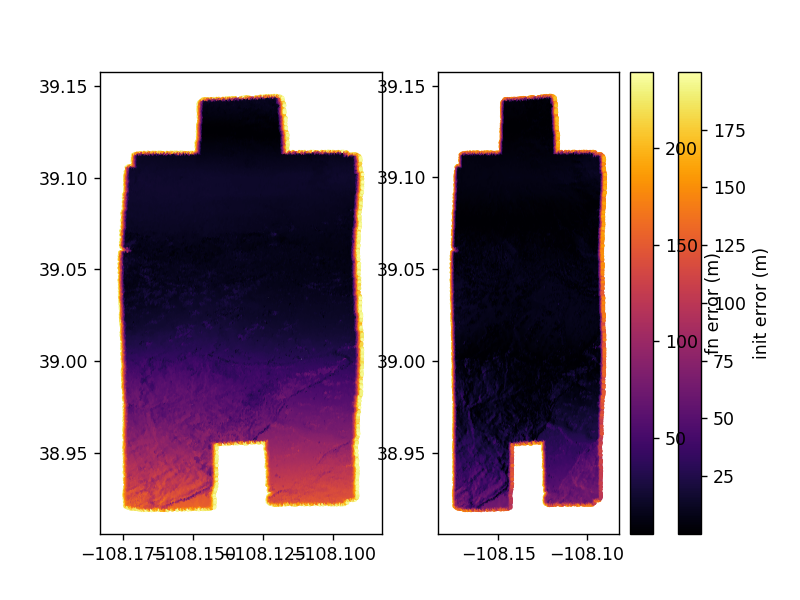

In [62]:
f,ax = plt.subplots(1,2)
im1 = ax[0].scatter(coreg_points_init['longitude'],coreg_points_init['# latitude'],
             c=coreg_points_init['error (meters)'],cmap='inferno',s=1)
plt.colorbar(im1,label='init error (m)')

im1 = ax[1].scatter(coreg_points_fn['longitude'],coreg_points_fn['# latitude'],
             c=coreg_points_fn['error (meters)'],cmap='inferno',s=1)
plt.colorbar(im1,label='fn error (m)')

<IPython.core.display.Javascript object>


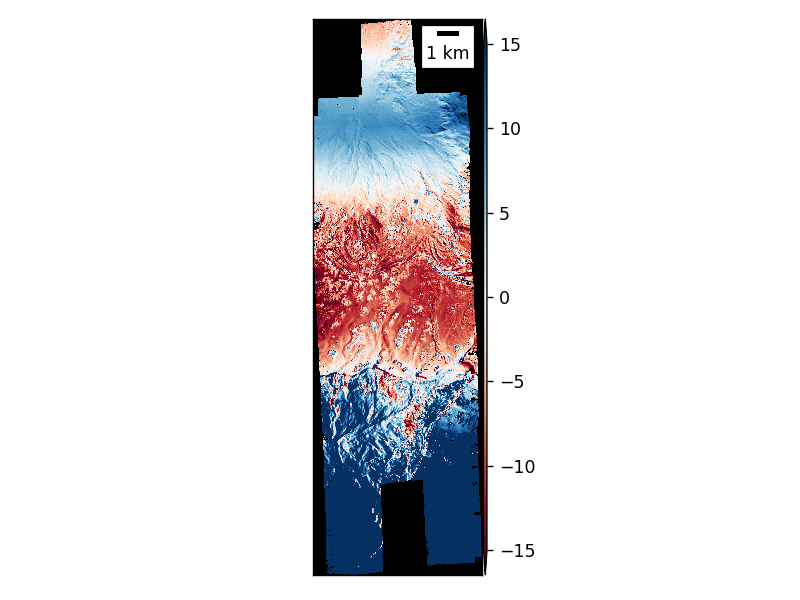

In [63]:
coreg_fn = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_run-trans_reference-DEM_diff.tif'
f,ax = plt.subplots()
pltlib.iv_fn(coreg_fn,ax=ax,cmap='RdBu',full=True,clim=(-15,15))

In [65]:
np.float(None)

TypeError: float() argument must be a string or a number, not 'NoneType'

<IPython.core.display.Javascript object>


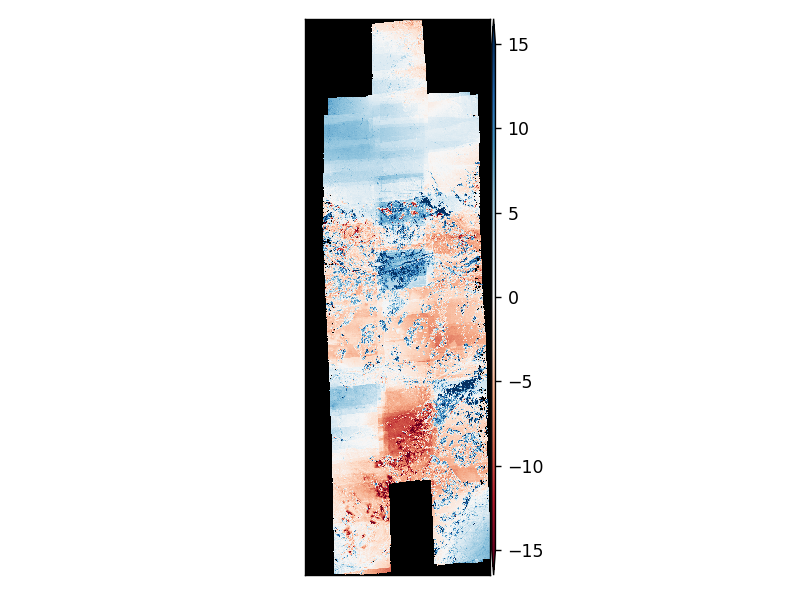

In [68]:
fn = '/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/refdem/gm_8m_trans-tile-0_gaussfill-tile-0_rpc_median_fn_diff.tif'
f,ax = plt.subplots()
pltlib.iv(iolib.fn_getma(fn)-11.81,ax=ax,cmap='RdBu',clim=(-15,15))

Post publication bundle adjustment update.

In [5]:
cnet = '/nobackup/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/ba_pinhole/run-cnet.csv'

In [6]:
with open(cnet,'r') as f:
        content = f.readlines()
content = [x.strip() for x in content]

In [75]:
content[0].count('.tif')

2

In [76]:
type(content)

list

In [8]:
final_gcp_list = []
outfn = os.path.splitext(cnet)[0]+'_gcp.gcp'
counter = 1
with open (outfn,'w') as f:
    for line in content:
        num_img = line.count('.tif')
        if num_img<4:
            continue
        else:
            new_str = f"{counter} {line.split(' ',1)[1]}"
            if num_img == 8:
                print(new_str)
            if num_img >=6:
                new_str = new_str.split(' 1 1 1 ')[0] + ' 1.5 1.5 1.5 '+new_str.split(' 1 1 1 ')[1]
            elif num_img ==5:
                new_str = new_str.split(' 1 1 1 ')[0] + ' 2.75 2.75 2.75 '+new_str.split(' 1 1 1 ')[1]
            elif num_img ==4:
                new_str = new_str.split(' 1 1 1 ')[0] + ' 3 3 3 '+new_str.split(' 1 1 1 ')[1]
            if num_img == 8:
                print(new_str)
            final_gcp_list.append(new_str)
            counter = counter + 1
            f.write(new_str+'\n')

5976 39.0708724003359364 -108.118417946495512 2718.42901042836593 1 1 1 l1b_img/20191202_175214_ssc4d1_0004_basic_panchromatic_dn.tif 300.054168701171875 1278.578125 1 1 l1b_img/20191202_175247_ssc4d1_0006_basic_panchromatic_dn.tif 516 731 1 1 l1b_img/20191202_175214_ssc4d1_0005_basic_panchromatic_dn.tif 320.898101806640625 158.499832153320312 1 1 l1b_img/20191202_175214_ssc4d2_0008_basic_panchromatic_dn.tif 3171.87109375 1187.5457763671875 1 1 l1b_img/20191202_175214_ssc4d2_0009_basic_panchromatic_dn.tif 3167.041015625 42.8678245544433594 1 1 l1b_img/20191202_175322_ssc4d1_0005_basic_panchromatic_dn.tif 368.530792236328125 452.1015625 1 1 l1b_img/20191202_175322_ssc4d2_0008_basic_panchromatic_dn.tif 3128.061767578125 1287.0479736328125 1 1 l1b_img/20191202_175322_ssc4d2_0009_basic_panchromatic_dn.tif 3092.513671875 123.689239501953125 1 1
5976 39.0708724003359364 -108.118417946495512 2718.42901042836593 1.5 1.5 1.5 l1b_img/20191202_175214_ssc4d1_0004_basic_panchromatic_dn.tif 300.0541

In [240]:
counter

76313

In [100]:
final_gcp_list[0]

'1 39.0977741324629164 -108.118557970037728 2279.13343122196284  1.75 1.75 1.75  l1b_img/20191202_175214_ssc4d1_0001_basic_panchromatic_dn.tif 470.95989990234375 1332.419677734375 1 1 l1b_img/20191202_175322_ssc4d2_0006_basic_panchromatic_dn.tif 3124 396 1 1 l1b_img/20191202_175214_ssc4d1_0002_basic_panchromatic_dn.tif 403.45831298828125 192.45086669921875 1 1 l1b_img/20191202_175214_ssc4d2_0005_basic_panchromatic_dn.tif 3167.3525390625 996.81500244140625 1 1 l1b_img/20191202_175247_ssc4d1_0002_basic_panchromatic_dn.tif 497.6298828125 1073.089599609375 1 1'

In [95]:
len(final_gcp_list)

76312

Output BA

In [241]:
ba_post_gcp = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/ba_pinhole/gcp_ba/run-final_residuals_no_loss_function_pointmap_point_log.csv',skiprows=[1])

/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [242]:
ba_post_gcp_init = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/ba_pinhole/gcp_ba/run-initial_residuals_no_loss_function_pointmap_point_log.csv',skiprows=[1])

In [243]:
ba_post_gcp

# lon        lat   height_above_datum   mean_residual  \
0      -108.118147  39.098136          2280.730844        0.072376   
1      -108.118140  39.100246          2283.845318        0.053444   
2      -108.118555  39.097776          2278.906168        0.207273   
3      -108.118552  39.098137          2277.141977        0.255374   
4      -108.118547  39.098510          2272.928680        0.199640   
...            ...        ...                  ...             ...   
443277 -108.144371  38.960914          2438.695318       34.746116   
443278 -108.144876  38.960387          2551.408783       22.570890   
443279 -108.144846  38.960754          2531.794920       24.661153   
443280 -108.145260  38.960279          2574.073339       20.115521   
443281 -108.145624  38.960786          2580.641146       19.032209   

        num_observations  
0                      2  
1                      2  
2                      5  
3                      5  
4                      5  
...                  ...  
443277           4 # GCP  
443278           4 # GCP  
443279           4 # GCP  
443280           4 # GCP  
443281           4 # GCP  

[443282 rows x 5 columns]

In [119]:
ba_post_gcp.dtypes

# lon                  float64
 lat                   float64
 height_above_datum    float64
 mean_residual         float64
 num_observations       object
dtype: object

In [244]:
ba_post_gcp[' num_observations'] = ba_post_gcp[' num_observations'].astype(str)

In [122]:
ba_post_gcp.dtypes

# lon                  float64
 lat                   float64
 height_above_datum    float64
 mean_residual         float64
 num_observations       object
dtype: object

In [245]:
mask_gcp = ba_post_gcp[' num_observations'].str.contains(' # GCP')

In [246]:
ba_post_gcp_gcp_only = ba_post_gcp[mask_gcp] 

In [247]:
ba_post_gcp_gcp_only

# lon        lat   height_above_datum   mean_residual  \
366970 -108.118549  39.097799          2283.798669        1.215974   
366971 -108.118545  39.098161          2282.018344        1.331600   
366972 -108.118540  39.098534          2277.845099        1.250983   
366973 -108.118544  39.098866          2285.859984        1.519592   
366974 -108.118542  39.099205          2291.927724        1.894149   
...            ...        ...                  ...             ...   
443277 -108.144371  38.960914          2438.695318       34.746116   
443278 -108.144876  38.960387          2551.408783       22.570890   
443279 -108.144846  38.960754          2531.794920       24.661153   
443280 -108.145260  38.960279          2574.073339       20.115521   
443281 -108.145624  38.960786          2580.641146       19.032209   

        num_observations  
366970           5 # GCP  
366971           5 # GCP  
366972           5 # GCP  
366973           5 # GCP  
366974           5 # GCP  
...                  ...  
443277           4 # GCP  
443278           4 # GCP  
443279           4 # GCP  
443280           4 # GCP  
443281           4 # GCP  

[76312 rows x 5 columns]

In [258]:
ba_post_gcp_tie_points_only = ba_post_gcp[~mask_gcp] 

In [259]:
ba_post_gcp_tie_points_only.sort_values(by=' num_observations',ascending=False)

# lon        lat   height_above_datum   mean_residual  \
20136  -108.118469  39.070746          2605.421575        0.511189   
20150  -108.118820  39.070750          2605.183823        0.534066   
172702 -108.144929  39.004476          3083.113500        0.228984   
12223  -108.120505  39.087169          2357.327895        0.266872   
166625 -108.145301  39.016146          3100.664120        0.877038   
...            ...        ...                  ...             ...   
318664 -108.108132  38.942354          3085.617673        0.224653   
318665 -108.108124  38.942909          3086.322984        0.117203   
318666 -108.108113  38.944578          3085.047470        0.009852   
318667 -108.108103  38.946247          3082.571090        0.122820   
366969 -108.169424  38.927623          2857.397389        0.000308   

        num_observations  
20136                  8  
20150                  8  
172702                 7  
12223                  7  
166625                 7  
...                  ...  
318664                 2  
318665                 2  
318666                 2  
318667                 2  
366969                 2  

[366970 rows x 5 columns]

In [141]:
plotter = ba_post_gcp_gcp_only.sort_values(by=' mean_residual',ascending=True)
ba_post_gcp_gcp_only.sort_values(by=' mean_residual',ascending=True)

# lon        lat   height_above_datum   mean_residual  \
437254 -108.148533  38.979423          2556.806360        0.019993   
381592 -108.118762  38.999357          3133.411731        0.025504   
390125 -108.098821  38.927623          2897.323361        0.030982   
398099 -108.135530  39.086612          2278.328935        0.032866   
389391 -108.106506  38.932952          3055.098630        0.033386   
...            ...        ...                  ...             ...   
373743 -108.121513  39.062918          1136.846796      338.542573   
384458 -108.107542  38.994951          1702.668909      400.606461   
432286 -108.153930  39.025062          4774.219284      466.238738   
387760 -108.105440  38.969129          1173.011542      564.982503   
412849 -108.143703  39.030208          1601.017886      642.523036   

        num_observations  
437254           4 # GCP  
381592           4 # GCP  
390125           4 # GCP  
398099           4 # GCP  
389391           4 # GCP  
...                  ...  
373743           5 # GCP  
384458           4 # GCP  
432286           4 # GCP  
387760           4 # GCP  
412849           6 # GCP  

[76312 rows x 5 columns]

<IPython.core.display.Javascript object>


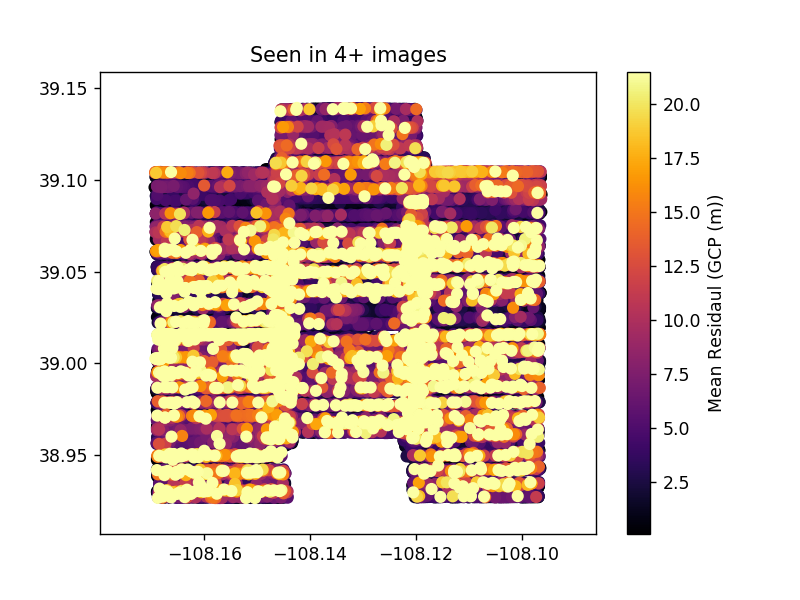

Text(0.5, 1.0, 'Seen in 4+ images')

In [142]:
f,ax = plt.subplots()
clim = np.percentile(plotter[' mean_residual'].values,(2,98))
im = ax.scatter(plotter['# lon'],plotter[' lat'],
       c=plotter[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno')
plt.colorbar(im,label='Mean Residaul (GCP (m))')
plt.title('Seen in 4+ images')

In [148]:
plotter[' num_observations'] = [np.float(x.split(' #')[0]) for x in plotter[' num_observations'].values]

<IPython.core.display.Javascript object>


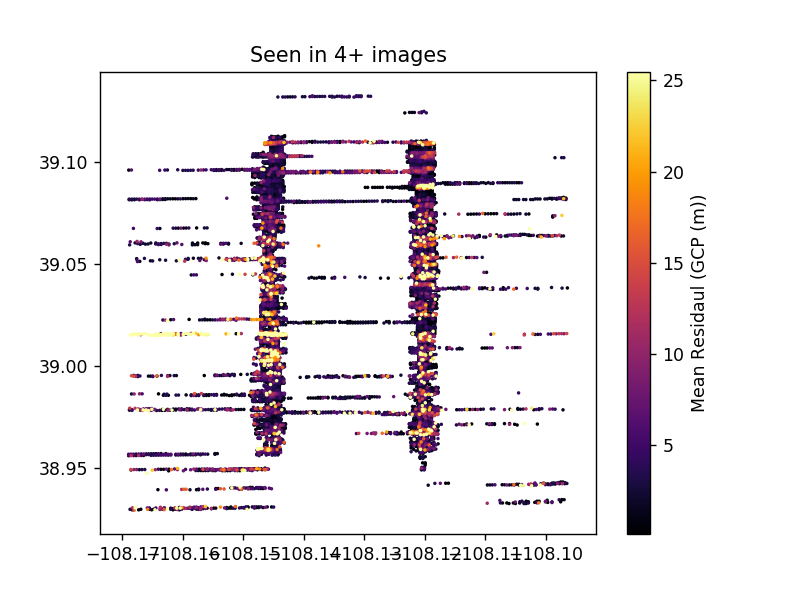

Text(0.5, 1.0, 'Seen in 4+ images')

In [154]:
mask_5_multiplicity = plotter[' num_observations']>=5
plotter = plotter[mask_5_multiplicity]
f,ax = plt.subplots()
clim = np.percentile(plotter[' mean_residual'].values,(2,98))
im = ax.scatter(plotter['# lon'],plotter[' lat'],
       c=plotter[' mean_residual'].values,vmin=clim[0],vmax=clim[1],cmap='inferno',s=1)
plt.colorbar(im,label='Mean Residaul (GCP (m))')
plt.title('Seen in 4+ images')

In [156]:
len(ba_post_gcp)

443282

In [157]:
len(ba_post_gcp_init)

443282

In [250]:
ba_post_gcp.tail()

# lon        lat   height_above_datum   mean_residual  \
443277 -108.144371  38.960914          2438.695318       34.746116   
443278 -108.144876  38.960387          2551.408783       22.570890   
443279 -108.144846  38.960754          2531.794920       24.661153   
443280 -108.145260  38.960279          2574.073339       20.115521   
443281 -108.145624  38.960786          2580.641146       19.032209   

        num_observations  
443277           4 # GCP  
443278           4 # GCP  
443279           4 # GCP  
443280           4 # GCP  
443281           4 # GCP

In [251]:
ba_post_gcp_init[' num_observations'] = ba_post_gcp_init[' num_observations'].astype('str')

In [252]:
ba_post_gcp_init.sort_values(by=' num_observations').tail(100)

# lon        lat   height_above_datum   mean_residual  \
67119  -108.120637  38.986280          2912.322639       14.425146   
67120  -108.120489  38.987176          2807.210331       45.767511   
67121  -108.120732  38.986691          2958.227250        4.008846   
68206  -108.120658  38.977442          3094.220706       22.541937   
131179 -108.146358  39.077695          2426.920278       16.574568   
...            ...        ...                  ...             ...   
151034 -108.146640  39.042325          3018.801929       13.269050   
129432 -108.145286  39.077459          2433.146504       16.154130   
149841 -108.119906  39.060249          2897.315121       21.492003   
20136  -108.118418  39.070872          2718.429010       34.589947   
20150  -108.118768  39.070868          2712.247866       32.760469   

        num_observations  
67119                  7  
67120                  7  
67121                  7  
68206                  7  
131179                 7  
...                  ...  
151034                 7  
129432                 7  
149841                 7  
20136                  8  
20150                  8  

[100 rows x 5 columns]

In [254]:
mask_gcp_init = ba_post_gcp_init[' num_observations'].str.contains(' # GCP')
ba_post_gcp_init_gcp_only = ba_post_gcp_init[mask_gcp_i

In [255]:
ba_post_gcp_init_gcp_only.sort_values(by=' num_observations').head(4)

# lon        lat   height_above_datum   mean_residual  \
443281 -108.145624  38.960785          2580.608477       18.860951   
432800 -108.156575  39.022656          3147.677780       12.642455   
432799 -108.156559  39.016192          3085.092181        0.626022   
432798 -108.156559  39.015913          3084.635628        0.633214   

        num_observations  
443281           4 # GCP  
432800           4 # GCP  
432799           4 # GCP  
432798           4 # GCP

In [256]:
ba_post_gcp_gcp_only.sort_values(by=' num_observations').head(4)

# lon        lat   height_above_datum   mean_residual  \
443281 -108.145624  38.960786          2580.641146       19.032209   
432800 -108.156577  39.022652          3147.424124       12.684333   
432799 -108.156558  39.016190          3085.273418        0.347216   
432798 -108.156558  39.015912          3084.886359        0.273412   

        num_observations  
443281           4 # GCP  
432800           4 # GCP  
432799           4 # GCP  
432798           4 # GCP

In [257]:
ba_init.sort_values(by = ' num_observations').tail(4)

# lon        lat   height_above_datum   mean_residual  \
6358   -108.120580  39.095318          2330.744052       10.679483   
150530 -108.145742  39.044836          2970.397820       27.015171   
20150  -108.118768  39.070868          2712.247866       32.760469   
20136  -108.118418  39.070872          2718.429010       34.589947   

         num_observations  
6358                    7  
150530                  7  
20150                   8  
20136                   8

In [234]:
ba_post_gcp.sort_values(by=' num_observations')

# lon        lat   height_above_datum   mean_residual  \
338988 -108.135532  38.984955          2669.721190        0.013663   
335785 -108.137978  39.007565          3089.740890        0.101869   
335784 -108.137978  39.007288          3085.617797        0.178612   
335783 -108.137979  39.007011          3091.728091        0.045034   
335782 -108.137976  39.006733          3100.296468        0.019523   
...            ...        ...                  ...             ...   
151034 -108.146590  39.042477          3053.094561        0.352388   
129432 -108.145362  39.077179          2394.059311        0.412062   
149841 -108.120000  39.059932          2962.480847        0.280069   
20136  -108.118474  39.070746          2605.581818        0.510054   
20150  -108.118825  39.070749          2605.388363        0.532704   

        num_observations  
338988                 2  
335785                 2  
335784                 2  
335783                 2  
335782                 2  
...                  ...  
151034                 7  
129432                 7  
149841                 7  
20136                  8  
20150                  8  

[443282 rows x 5 columns]

In [193]:
ba_init = pd.read_csv('/nobackupp2/sbhusha1/conus_stereo2swe/conus_stereo2swe_gm/skysat_triplet_20191202/l1b_gm_20191202_processing/proc_out/ba_pinhole/run-initial_residuals_no_loss_function_pointmap_point_log_initial_reproj_error.csv',skiprows=[1])
ba_init.sort_values(by = ' num_observations').tail(4)

# lon        lat   height_above_datum   mean_residual  \
6358   -108.120580  39.095318          2330.744052       10.679483   
150530 -108.145742  39.044836          2970.397820       27.015171   
20150  -108.118768  39.070868          2712.247866       32.760469   
20136  -108.118418  39.070872          2718.429010       34.589947   

         num_observations  
6358                    7  
150530                  7  
20150                   8  
20136                   8

In [168]:
ba_post_gcp[((ba_post_gcp['# lon'].values + 108.145107) == 0.000000)]

Empty DataFrame
Columns: [# lon,  lat,  height_above_datum,  mean_residual,  num_observations]
Index: []

In [166]:
ba_post_gcp['# lon'].values

array([-108.11814909, -108.11814215, -108.11855663, ..., -108.14469993,
       -108.1451072 , -108.14547914])

In [176]:
ba_post_gcp[np.round(ba_post_gcp['# lon'].values,6) == -108.145107]

# lon        lat   height_above_datum   mean_residual  \
141660 -108.145107  39.066302          2583.598147        0.516720   
195417 -108.145107  38.968767          2680.576193        0.135673   
195421 -108.145107  38.970154          2671.949767        0.113051   
195422 -108.145107  38.970429          2674.136431        0.172455   
195426 -108.145107  38.971818          2652.394952        0.208836   
242744 -108.145107  39.032196          3133.376122        0.557969   
333196 -108.145107  39.031904          3131.041877        0.304995   
402435 -108.145107  39.070879          2502.495960        4.797769   
402436 -108.145107  39.071251          2489.843251        1.931918   
422959 -108.145107  38.970958          2681.939125        1.402186   
423552 -108.145107  38.969571          2664.851443        1.356346   
424975 -108.145107  38.963497          2759.624332        3.263399   
443280 -108.145107  38.959275          2868.453373        4.779105   

        num_observations  
141660                 4  
195417                 5  
195421                 5  
195422                 4  
195426                 4  
242744                 3  
333196                 3  
402435           5 # GCP  
402436           5 # GCP  
422959           4 # GCP  
423552           5 # GCP  
424975           4 # GCP  
443280           4 # GCP

# How much do the ips change ?

In [263]:
ba_post_gcp_init_ip_only = ba_post_gcp_init[~mask_gcp_init]

In [264]:
ba_post_gcp_init_ip_only

# lon        lat   height_above_datum   mean_residual  \
0      -108.118146  39.098135          2282.616044        0.052001   
1      -108.118138  39.100248          2285.537279        0.093070   
2      -108.118550  39.097799          2283.913644        1.160294   
3      -108.118546  39.098160          2282.115572        1.287246   
4      -108.118540  39.098534          2277.929599        1.215152   
...            ...        ...                  ...             ...   
366965 -108.169455  38.924560          2872.587258        0.619915   
366966 -108.169449  38.925120          2859.826488        0.605476   
366967 -108.169446  38.925675          2868.806470        0.809941   
366968 -108.169440  38.926791          2862.968897        0.656242   
366969 -108.169437  38.927630          2849.645456        0.302239   

        num_observations  
0                      2  
1                      2  
2                      5  
3                      5  
4                      5  
...                  ...  
366965                 2  
366966                 2  
366967                 2  
366968                 2  
366969                 2  

[366970 rows x 5 columns]

In [262]:
ba_post_gcp_tie_points_only

# lon        lat   height_above_datum   mean_residual  \
0      -108.118147  39.098136          2280.730844        0.072376   
1      -108.118140  39.100246          2283.845318        0.053444   
2      -108.118555  39.097776          2278.906168        0.207273   
3      -108.118552  39.098137          2277.141977        0.255374   
4      -108.118547  39.098510          2272.928680        0.199640   
...            ...        ...                  ...             ...   
366965 -108.169435  38.924563          2880.749572        0.038537   
366966 -108.169431  38.925122          2867.912943        0.154684   
366967 -108.169429  38.925674          2876.910136        0.291092   
366968 -108.169425  38.926786          2870.916319        0.219006   
366969 -108.169424  38.927623          2857.397389        0.000308   

        num_observations  
0                      2  
1                      2  
2                      5  
3                      5  
4                      5  
...                  ...  
366965                 2  
366966                 2  
366967                 2  
366968                 2  
366969                 2  

[366970 rows x 5 columns]

In [266]:
ba_post_gcp_tie_points_only.describe()

# lon            lat   height_above_datum   mean_residual
count  366970.000000  366970.000000        366970.000000    3.669700e+05
mean     -108.133389      39.027481          2762.208143    5.368301e-01
std         0.021671       0.056262           364.919764    7.749393e+00
min      -108.174143      38.919623         -4581.584816    2.531421e-07
25%      -108.151412      38.980794          2478.121990    1.281938e-01
50%      -108.133529      39.027174          2872.604925    2.089905e-01
75%      -108.115611      39.075534          3085.037291    3.491223e-01
max      -108.091977      39.142886          8872.152087    1.271454e+03

In [267]:
ba_post_gcp_init_ip_only.describe()

# lon            lat   height_above_datum   mean_residual
count  366970.000000  366970.000000        366970.000000   366970.000000
mean     -108.133395      39.027455          2769.851711        4.437387
std         0.021671       0.056246           382.071973       28.473622
min      -108.174127      38.919597         -1125.717729        0.000009
25%      -108.151415      38.980813          2482.692373        0.359159
50%      -108.133535      39.027173          2872.305307        0.637086
75%      -108.115617      39.075517          3088.103747        1.453265
max      -108.091974      39.142893         10237.367508     1457.501704

In [268]:
ba_post_gcp_init_ip_only.keys()

Index(['# lon', ' lat', ' height_above_datum', ' mean_residual',
       ' num_observations'],
      dtype='object')

In [271]:
ht_diff = ba_post_gcp_init_ip_only[' height_above_datum'].values - ba_post_gcp_tie_points_only[' height_above_datum'].values

In [272]:
malib.get_stats_dict(ht_diff)

{'count': 366970,
 'min': -4178.349023178371,
 'max': 7286.82730182968,
 'ptp': 11465.176325008051,
 'mean': 7.643568483781767,
 'std': 107.48510554273223,
 'nmad': 2.4581982525031365,
 'med': 0.06023638168881007,
 'median': 0.06023638168881007,
 'p16': -2.707271398727608,
 'p84': 5.025767337780594,
 'spread': 3.866519368254101,
 'mode': -4178.349023178371}

<IPython.core.display.Javascript object>


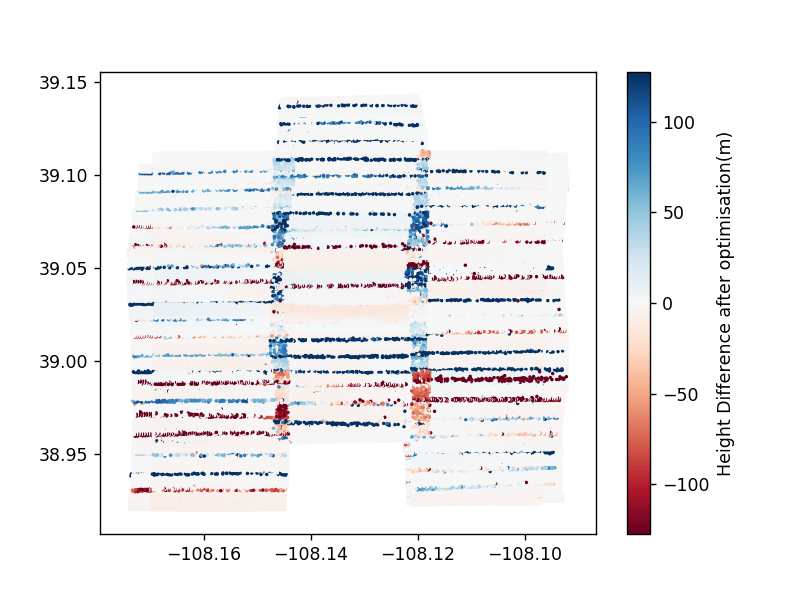

In [275]:
f,ax = plt.subplots()
clim = malib.calcperc_sym(ht_diff,(2,98))
im = ax.scatter(ba_post_gcp_init_ip_only['# lon'],ba_post_gcp_init_ip_only[' lat'],
       c=ht_diff,vmin=clim[0],vmax=clim[1],cmap='RdBu',s=1)
plt.colorbar(im,label='Height Difference after optimisation(m)')
#plt.title('Seen in 4+ images')

In [276]:
from shapely.geometry import Point,Polygon
from pyproj import Proj, transform

In [279]:
def point_convert(lon,lat,proj_out='epsg:32612'):
    proj_in = 'epsg:4326'
    incord = Proj(init=proj_in)
    outcord = Proj(init=proj_out)
    return transform(incord,outcord,lon,lat)

In [282]:
init_x,init_y = point_convert(ba_post_gcp_init_ip_only['# lon'].values,
                              ba_post_gcp_init_ip_only[' lat'].values)

In [283]:
fn_x,fn_y = point_convert(ba_post_gcp_tie_points_only['# lon'].values,
                              ba_post_gcp_tie_points_only[' lat'].values)

In [287]:
shiftx = fn_x - init_x
shifty = fn_y - fn_y

In [288]:
shiftx

array([-0.08959759, -0.13032306, -0.41854331, ...,  1.45154076,
        1.39110341,  1.22009026])

In [289]:
shifty

array([0., 0., 0., ..., 0., 0., 0.])

In [291]:
print(f'{len(shiftx)},{len(shifty)},{len(init_x)}, {len(init_y)}, {len(np.sqrt(shiftx**2+shifty**2))},')

366970,366970,366970, 366970, 366970,


In [293]:
f,ax = plt.subplots()
ax.quiver([init_x,init_y], shiftx, shifty,)

<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with shapes (733940,) (366970,) 